In [1]:
####   
#Fz Einfluss auf Reifenmodelle
####

import numpy as np
import matplotlib.pyplot as plt

import sys
import os
sys.path.insert(0, os.path.abspath('../model'))

import Pacejka52 as pa52
import fiala as fi
import Brush as br
import TMeasy as tm
import Dugoff as du
import Pacejka52_glSA as pa52gl

sys.path.insert(0, os.path.abspath('../model/parameter'))
import Pacejka_Params_Indy as pa


i=1000
Sx = np.linspace(-1,1,i)
Sy = np.linspace(-0.3,0.3,i)
Fz0 = 3114
IA = 0

iter = 1000 #
Fz = np.linspace(1500,5000,iter)


Text(0.5, 1.0, 'Fx_max vs. Fz')

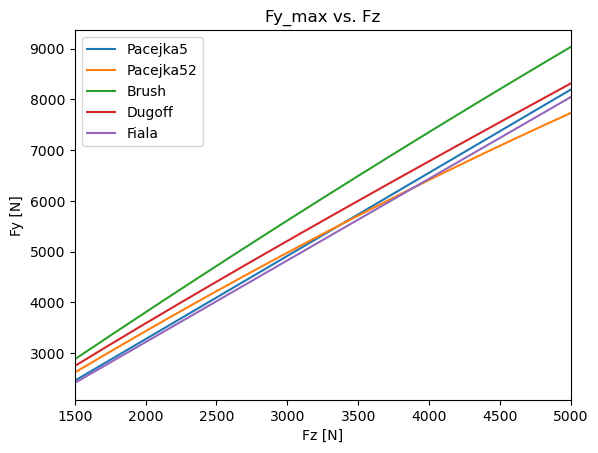

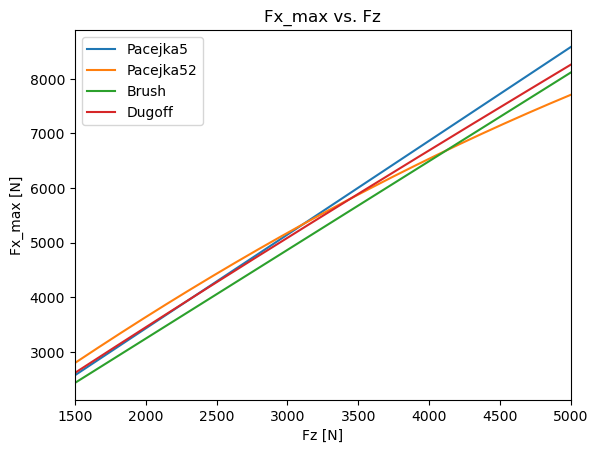

In [86]:
#Fz-Fy  , Fz -Fy


j = 0
plt.figure(1)
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka5")

j = 0
Fy_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Pacejka52")

mu_lat = 1.96838261e+00
Ca_lat = 9.71111628e+04
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Brush")

Cs = 2.74289218e-01
Ca = 6.16477615e+03
mu = 1.43548745e-01
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Dugoff")

C_lat = -1.26902260e+05
mu1 = -2.32752807e+00
mu2 = -1.44561563e+00
j=0
Fy_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    Fy_max[j] = np.max(Fy)
plt.plot(Fz,Fy_max, label = "Fiala")

plt.xlabel("Fz [N]")
plt.ylabel("Fy [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fy_max vs. Fz")
#Fx vs. Fz

j = 0
plt.figure(2)
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka5")

j = 0
Fx_max = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Pacejka52")


mu_long  = 1.62344260e+00
kt_long  = 3.63683914e+06
lam_long = 3.10083340e-02
j=0
Fx_max = np.zeros(len(Fz))
Sx_br = np.linspace(0,1,iter)
for j in range(len(Fz)):
    Fx = br.brush_long(Sx_br,Fz[j],mu_long,kt_long,lam_long)
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Brush")

Cs = 1.54528498e+05
Ca = -1.96810483e+01
mu = 1.25090001e+00
j=0
Fx_max = np.zeros(len(Fz))
for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    Fx_max[j] = np.max(Fx)
plt.plot(Fz,Fx_max, label = "Dugoff")


plt.xlabel("Fz [N]")
plt.ylabel("Fx_max [N]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Fx_max vs. Fz")



(0.1, 0.15)

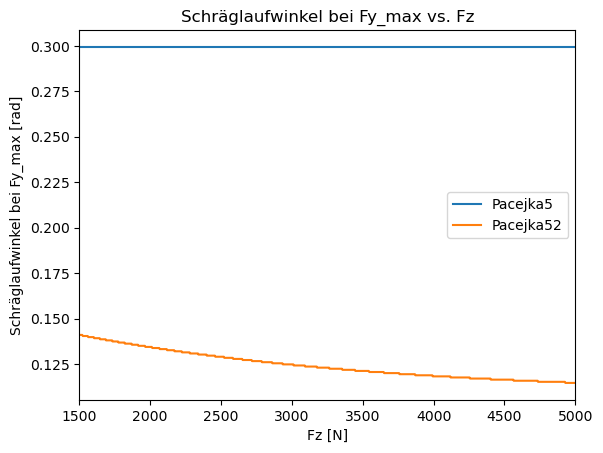

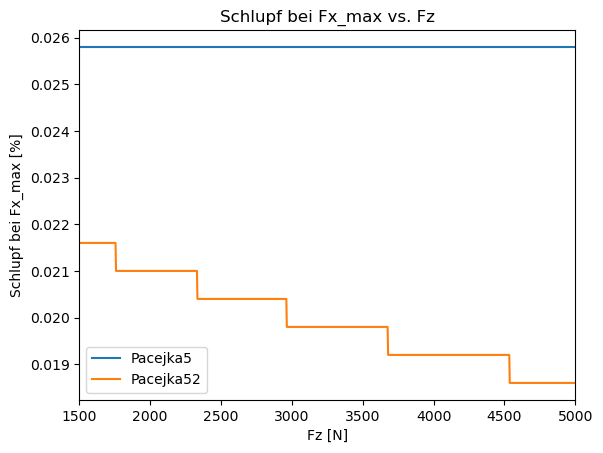

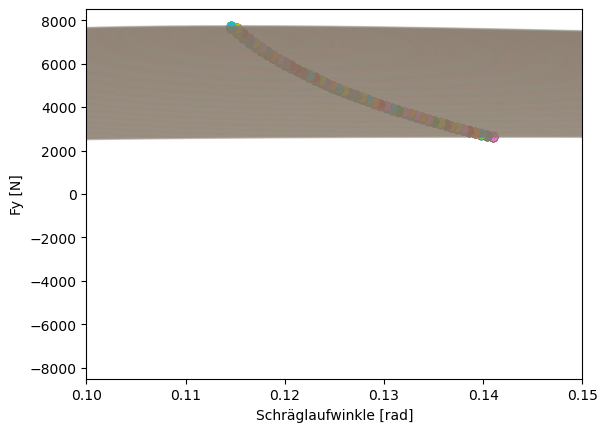

In [87]:
j = 0
plt.figure(1)
Fy_max_slip5 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka5_lat(Sy,Fz[j])
    Fy_max_slip5[j] = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fy_max_slip5, label = "Pacejka5")

j = 0
Fy_max_slip52 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    Fy_max_slip52[j] = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fy_max_slip52, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Schräglaufwinkel bei Fy_max [rad]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Schräglaufwinkel bei Fy_max vs. Fz")

#Fx

j = 0
plt.figure(2)
Fx_max_slip5 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka5_long(Sx,Fz[j])
    Fx_max_slip5[j] = (np.argmax(Fx)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fx_max_slip5, label = "Pacejka5")

j = 0
Fx_max_slip52 = np.zeros(len(Fz))
for j in range(0,len(Fz)):
    Fx = pa52.Pacejka52_long(Fz[j],Sx,IA,Fz0)[0]
    Fx_max_slip52[j] = (np.argmax(Fx)-(i/2)) * (0.3 / (i/2))
plt.plot(Fz,Fx_max_slip52, label = "Pacejka52")

plt.xlabel("Fz [N]")
plt.ylabel("Schlupf bei Fx_max [%]")
plt.xlim(1500,5000)
plt.legend()
plt.title("Schlupf bei Fx_max vs. Fz")

plt.figure(3)
j=0
for j in range(0, len(Fz)):
    Fy = pa52.Pacejka52_lat(Fz[j],Sy,IA,Fz0)[0]
    plt.plot(Sy,Fy, alpha = 0.1)
    max = (np.argmax(Fy)-(i/2)) * (0.3 / (i/2))
    y=np.max(Fy)
    plt.scatter(max,y)

plt.xlabel("Schräglaufwinkle [rad]")
plt.ylabel("Fy [N]")
plt.xlim(0.1,0.15)


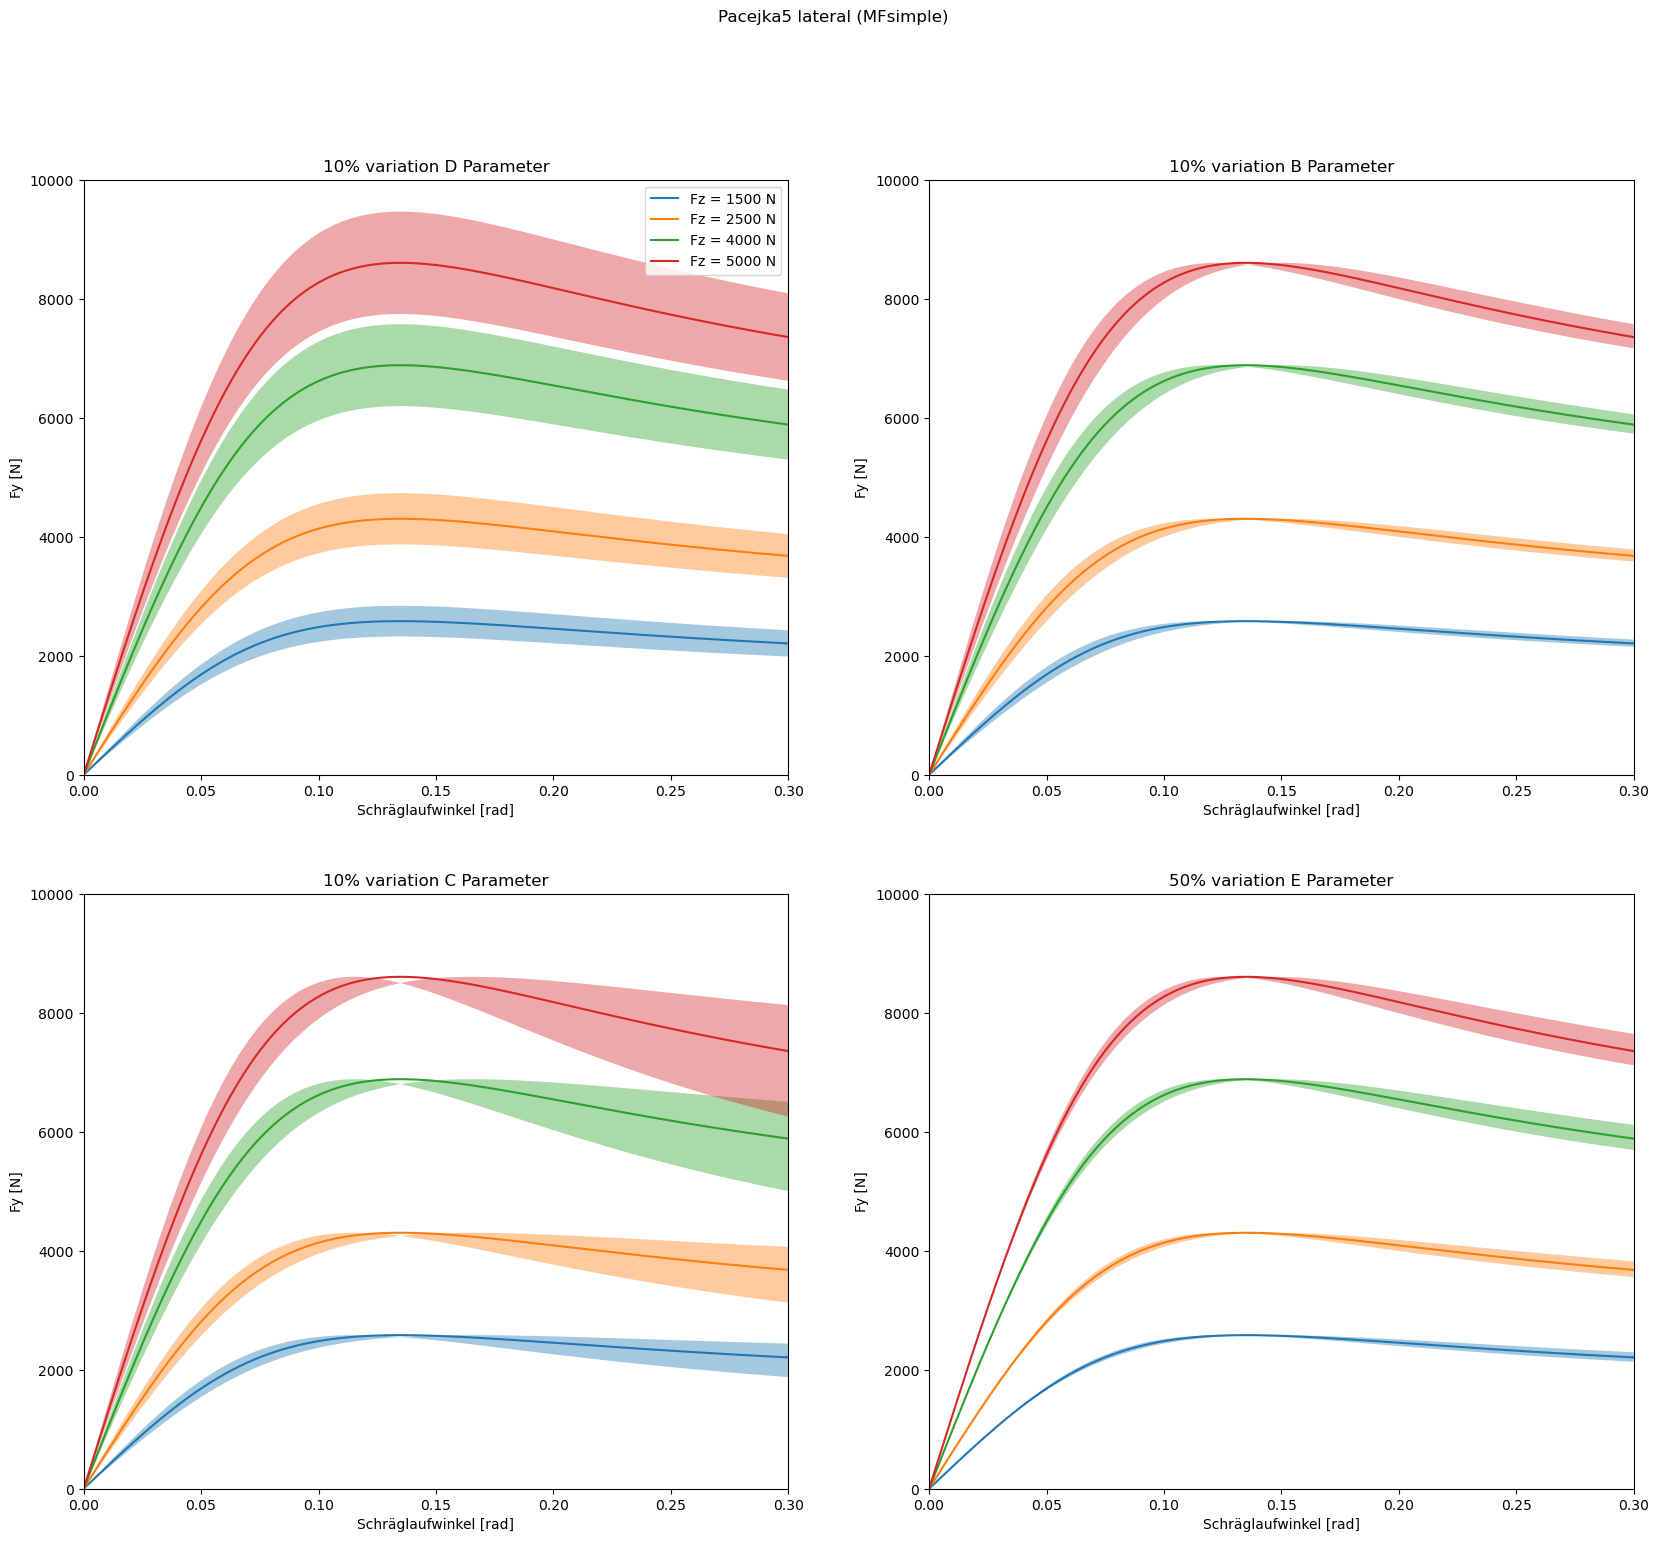

In [88]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
B_lat = -9.06434405
C_lat = 1.60162373
D_lat = -1.72069169
E_lat = -0.80265574

fig, ax = plt.subplots(2,2, figsize = (20,17))
fig.suptitle('Pacejka5 lateral (MFsimple)')
for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[0, 0].plot(Sy,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    D_lat_pos =  D_lat * 1.1
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat_pos,E_lat)
    #plt.plot(Sy,Fy_pos, 'r--')

    D_lat_neg =  D_lat * 0.9
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat_neg,E_lat)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0, 0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0,0].set_title('10% variation D Parameter')
ax[0,0].set_ylabel('Fy [N]')
ax[0,0].set_xlabel('Schräglaufwinkel [rad]')
ax[0,0].set_xlim((0,0.3))
ax[0,0].set_ylim((0,10000))
ax[0,0].legend()

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[0, 1].plot(Sy,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    B_lat_pos =  B_lat * 1.1
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat_pos,C_lat,D_lat,E_lat)
    #plt.plot(Sy,Fy_pos, 'r--')

    B_lat_neg =  B_lat * 0.9
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat_neg,C_lat,D_lat,E_lat)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0, 1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0,1].set_title('10% variation B Parameter')
ax[0,1].set_ylabel('Fy [N]')
ax[0,1].set_xlabel('Schräglaufwinkel [rad]')
ax[0,1].set_xlim((0,0.3))
ax[0,1].set_ylim((0,10000))
ax[0,0].legend()

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[1, 0].plot(Sy,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    C_lat_pos =  C_lat * 1.1
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat_pos,D_lat,E_lat)
    #plt.plot(Sy,Fy_pos, 'r--')

    C_lat_neg =  C_lat * 0.9
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat_neg,D_lat,E_lat)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1, 0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1,0].set_title('10% variation C Parameter')
ax[1,0].set_ylabel('Fy [N]')
ax[1,0].set_xlabel('Schräglaufwinkel [rad]')
ax[1,0].set_xlim((0,0.3))
ax[1,0].set_ylim((0,10000))
ax[0,0].legend()

for j in range(len(Fz)):
    Fy = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat)
    ax[1, 1].plot(Sy,Fy, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    E_lat_pos =  E_lat * 1.5
    Fy_pos = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    E_lat_neg =  E_lat * 0.5
    Fy_neg = pa52. Pacejka5_lat_pa(Sy,Fz[j],B_lat,C_lat,D_lat,E_lat_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1, 1].fill_between(Sy,Fy_pos,Fy_neg, alpha = 0.4)
ax[1,1].set_title('50% variation E Parameter')
ax[1,1].set_ylabel('Fy [N]')
ax[1,1].set_xlabel('Schräglaufwinkel [rad]')
ax[1,1].set_xlim((0,0.3))
ax[1,1].set_ylim((0,10000))
ax[0,0].legend()

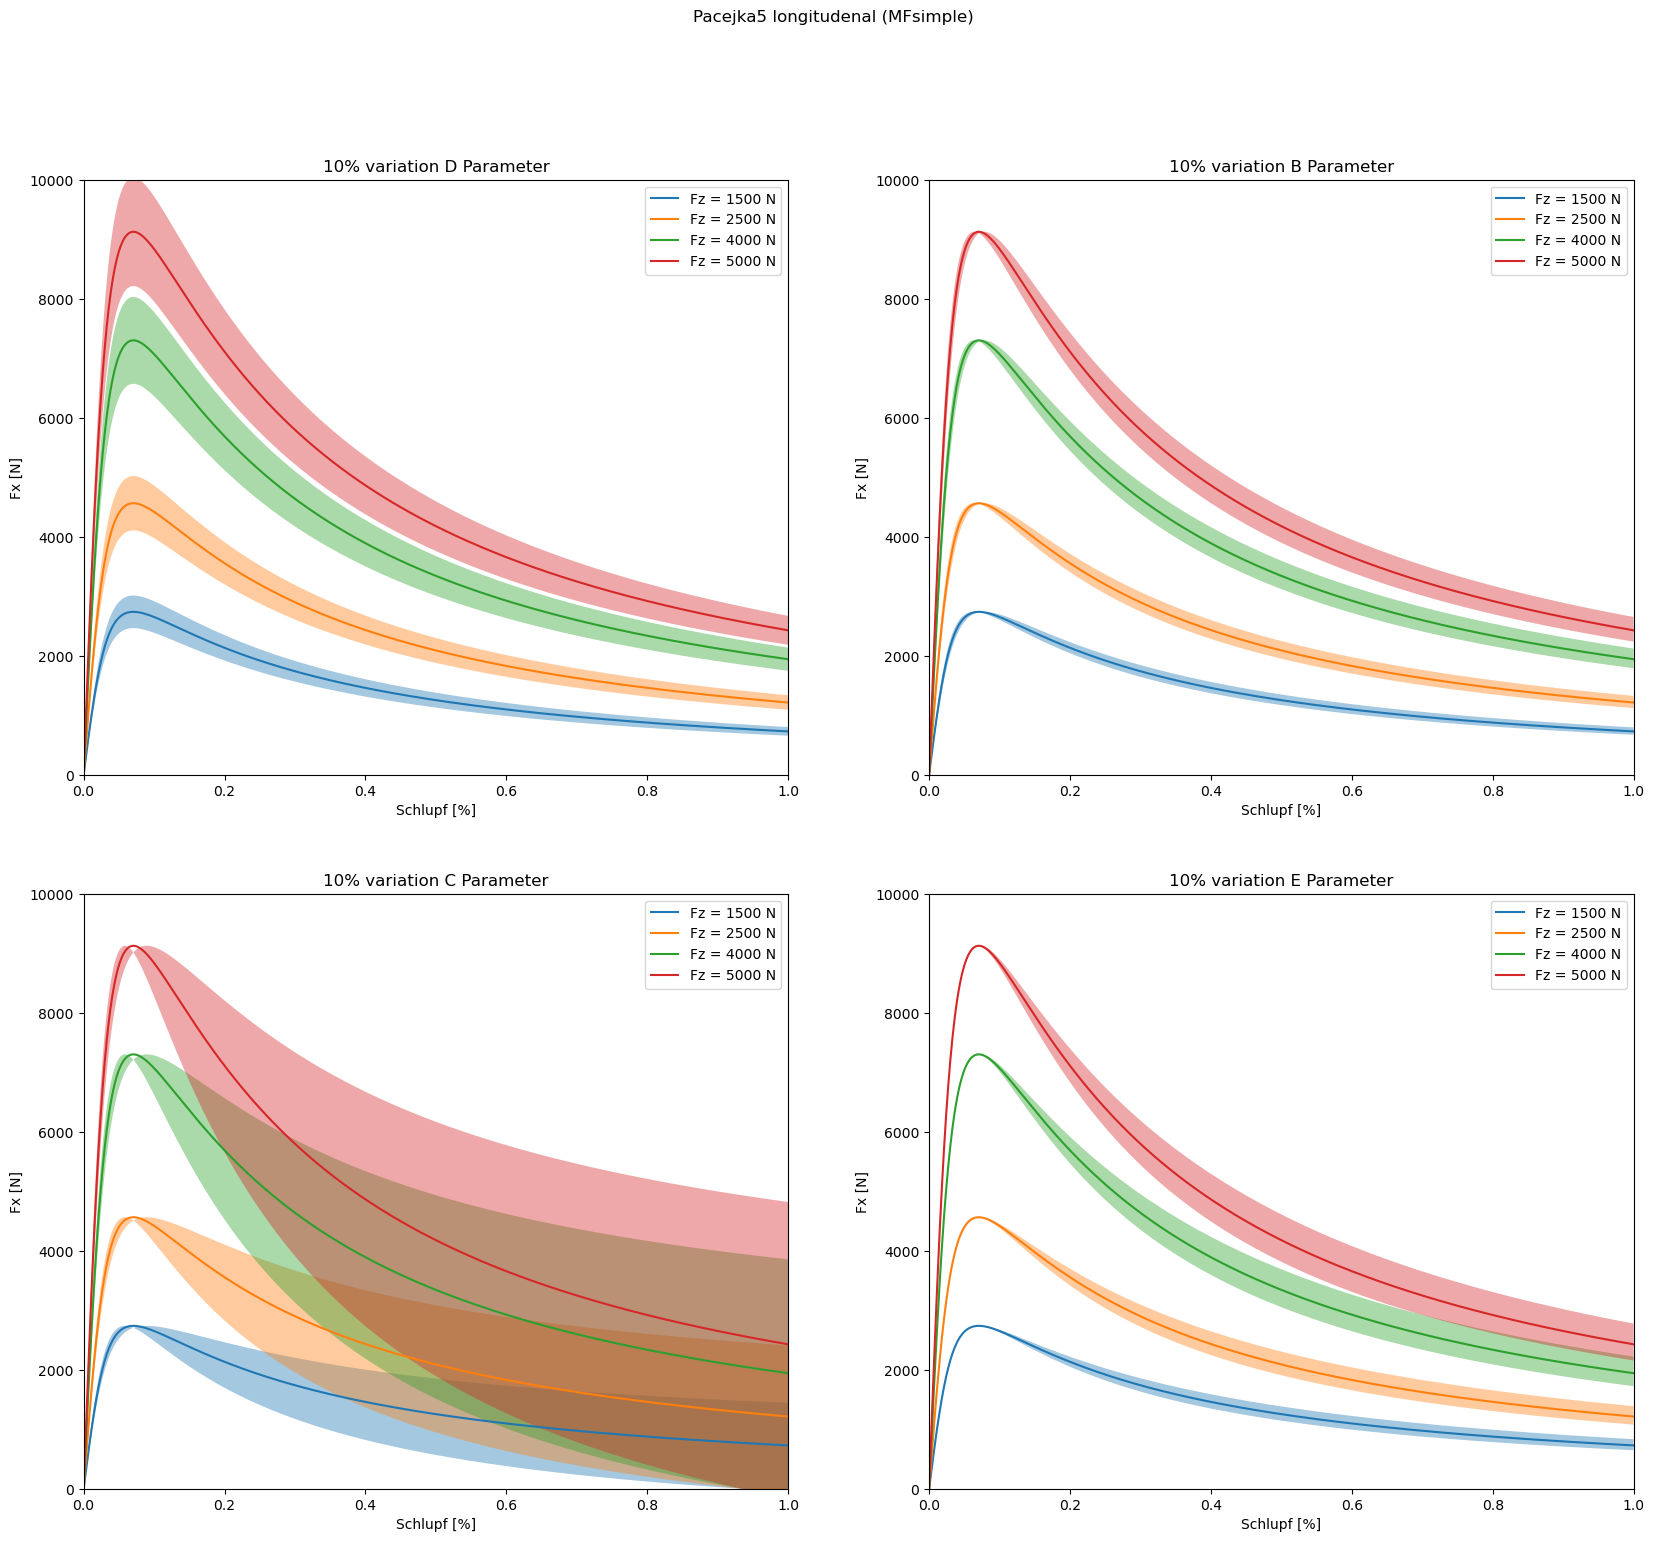

In [89]:
Fz = [1500, 2500, 4000, 5000]

Sx = np.linspace(0,1,1000)
B_long =17.04378049
C_long =1.99996234
D_long =1.82504605
E_long = 0.62177794


fig, ax = plt.subplots(2,2, figsize = (20,17))
fig.suptitle('Pacejka5 longitudenal (MFsimple)')
for j in range(len(Fz)):
    Fx = pa52. Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[0, 0].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    D_long_pos =  D_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long_pos,E_long)
    #plt.plot(Sy,Fy_pos, 'r--')

    D_long_neg =  D_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long_neg,E_long)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0, 0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[0,0].set_title('10% variation D Parameter')
ax[0,0].set_ylabel('Fx [N]')
ax[0,0].set_xlabel('Schlupf [%]')
ax[0,0].set_xlim((0,1))
ax[0,0].set_ylim((0,10000))
ax[0,0].legend()


for j in range(len(Fz)):
    Fx = pa52. Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[0, 1].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    B_long_pos = B_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long_pos,C_long,D_long,E_long)
    #plt.plot(Sy,Fy_pos, 'r--')

    B_long_neg =  B_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long_neg,C_long,D_long,E_long)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0, 1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[0,1].set_title('10% variation B Parameter')
ax[0,1].set_ylabel('Fx [N]')
ax[0,1].set_xlabel('Schlupf [%]')
ax[0,1].set_xlim((0,1))
ax[0,1].set_ylim((0,10000))
ax[0,1].legend()

for j in range(len(Fz)):
    Fx = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[1, 0].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    C_long_pos = C_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long_pos,D_long,E_long)
    #plt.plot(Sy,Fy_pos, 'r--')

    C_long_neg =  C_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long_neg,D_long,E_long)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1, 0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[1,0].set_title('10% variation C Parameter')
ax[1,0].set_ylabel('Fx [N]')
ax[1,0].set_xlabel('Schlupf [%]')
ax[1,0].set_xlim((0,1))
ax[1,0].set_ylim((0,10000))
ax[1,0].legend()

for j in range(len(Fz)):
    Fx = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long)
    ax[1, 1].plot(Sx,Fx, label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    E_long_pos = E_long * 1.1
    Fx_pos = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    E_long_neg =  E_long * 0.9
    Fx_neg = pa52.Pacejka5_long_pa(Sx,Fz[j],B_long,C_long,D_long,E_long_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1, 1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[1,1].set_title('10% variation E Parameter')
ax[1,1].set_ylabel('Fx [N]')
ax[1,1].set_xlabel('Schlupf [%]')
ax[1,1].set_xlim((0,1))
ax[1,1].set_ylim((0,10000))
ax[1,1].legend()

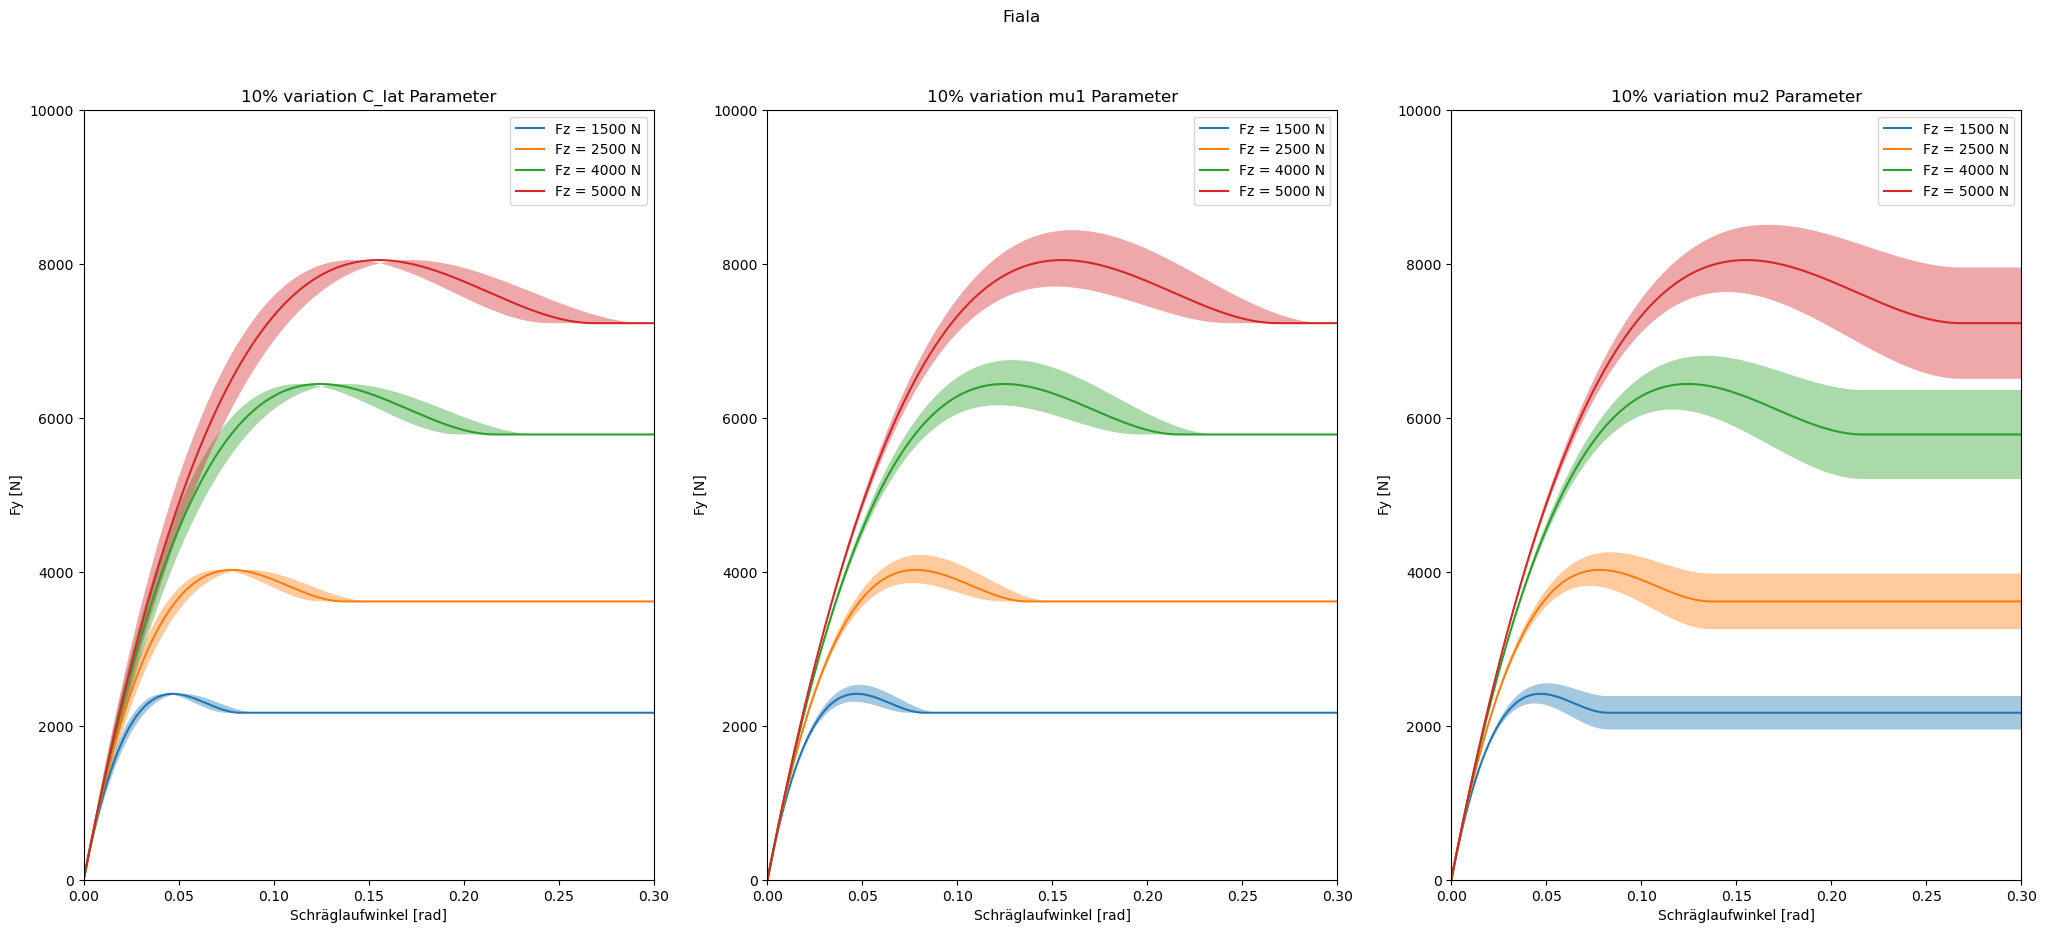

In [90]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
C_lat = -1.26902260e+05
mu1 = -2.32752807e+00
mu2 = -1.44561563e+00

fig, ax = plt.subplots(1,3, figsize = (25,10))
fig.suptitle('Fiala')
for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    ax[0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    C_lat_pos =  C_lat * 1.1
    Fy_pos = fi.fiala_lat(Sy,Fz[j],C_lat_pos,mu1,mu2)
    #plt.plot(Sy,Fy_pos, 'r--')

    C_lat_neg =  C_lat * 0.9
    Fy_neg = fi.fiala_lat(Sy,Fz[j],C_lat_neg,mu1,mu2)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0].set_title('10% variation C_lat Parameter')
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [rad]')
ax[0].set_xlim((0,0.3))
ax[0].set_ylim((0,10000))
ax[0].legend()

for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    ax[1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu1_pos =  mu1 * 1.1
    Fy_pos = fi.fiala_lat(Sy,Fz[j],C_lat,mu1_pos,mu2)
    #plt.plot(Sy,Fy_pos, 'r--')

    mu1_neg =  mu1 * 0.9
    Fy_neg = fi.fiala_lat(Sy,Fz[j],C_lat,mu1_neg,mu2)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[ 1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1].set_title('10% variation mu1 Parameter')
ax[1].set_ylabel('Fy [N]')
ax[1].set_xlabel('Schräglaufwinkel [rad]')
ax[1].set_xlim((0,0.3))
ax[1].set_ylim((0,10000))
ax[1].legend()

for j in range(len(Fz)):
    Fy = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2)
    ax[2].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu2_pos =  mu2 * 1.1
    Fy_pos = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    mu2_neg =  mu2 * 0.9
    Fy_neg = fi.fiala_lat(Sy,Fz[j],C_lat,mu1,mu2_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[2].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[2].set_title('10% variation mu2 Parameter')
ax[2].set_ylabel('Fy [N]')
ax[2].set_xlabel('Schräglaufwinkel [rad]')
ax[2].set_xlim((0,0.3))
ax[2].set_ylim((0,10000))
ax[2].legend()


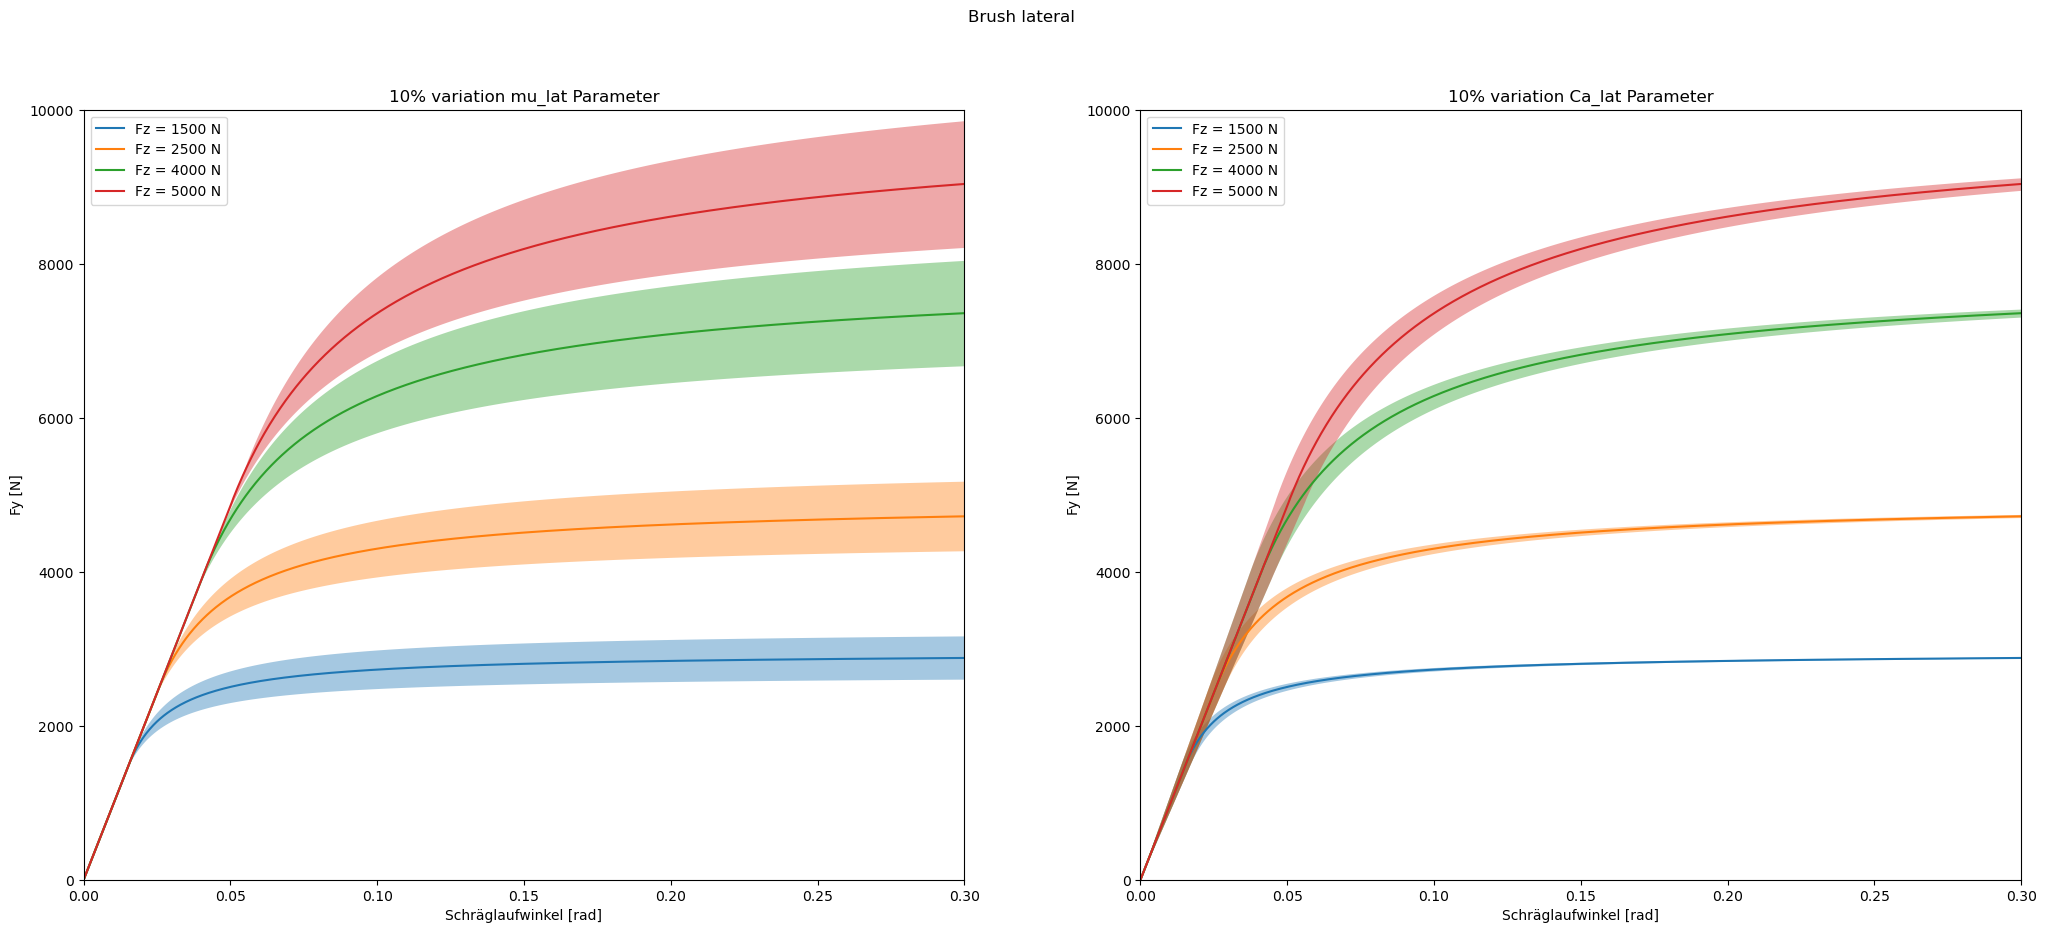

In [91]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
mu_lat = 1.96838261e+00
Ca_lat = 9.71111628e+04

fig, ax = plt.subplots(1,2, figsize = (25,10))
fig.suptitle('Brush lateral')
for j in range(len(Fz)):
    Fy = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat)
    ax[0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_lat_pos =  mu_lat * 1.1
    Fy_pos = br.brush_lat(Sy, Fz[j], mu_lat_pos, Ca_lat)
    #plt.plot(Sy,Fy_pos, 'r--')

    mu_lat_neg =  mu_lat * 0.9
    Fy_neg = br.brush_lat(Sy, Fz[j], mu_lat_neg, Ca_lat)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[0].set_title('10% variation mu_lat Parameter')
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [rad]')
ax[0].set_xlim((0,0.3))
ax[0].set_ylim((0,10000))
ax[0].legend()



for j in range(len(Fz)):
    Fy = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat)
    ax[1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Ca_lat_pos =  Ca_lat * 1.1
    Fy_pos = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    Ca_lat_neg =  Ca_lat * 0.9
    Fy_neg = br.brush_lat(Sy, Fz[j], mu_lat, Ca_lat_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1].set_title('10% variation Ca_lat Parameter')
ax[1].set_ylabel('Fy [N]')
ax[1].set_xlabel('Schräglaufwinkel [rad]')
ax[1].set_xlim((0,0.3))
ax[1].set_ylim((0,10000))
ax[1].legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


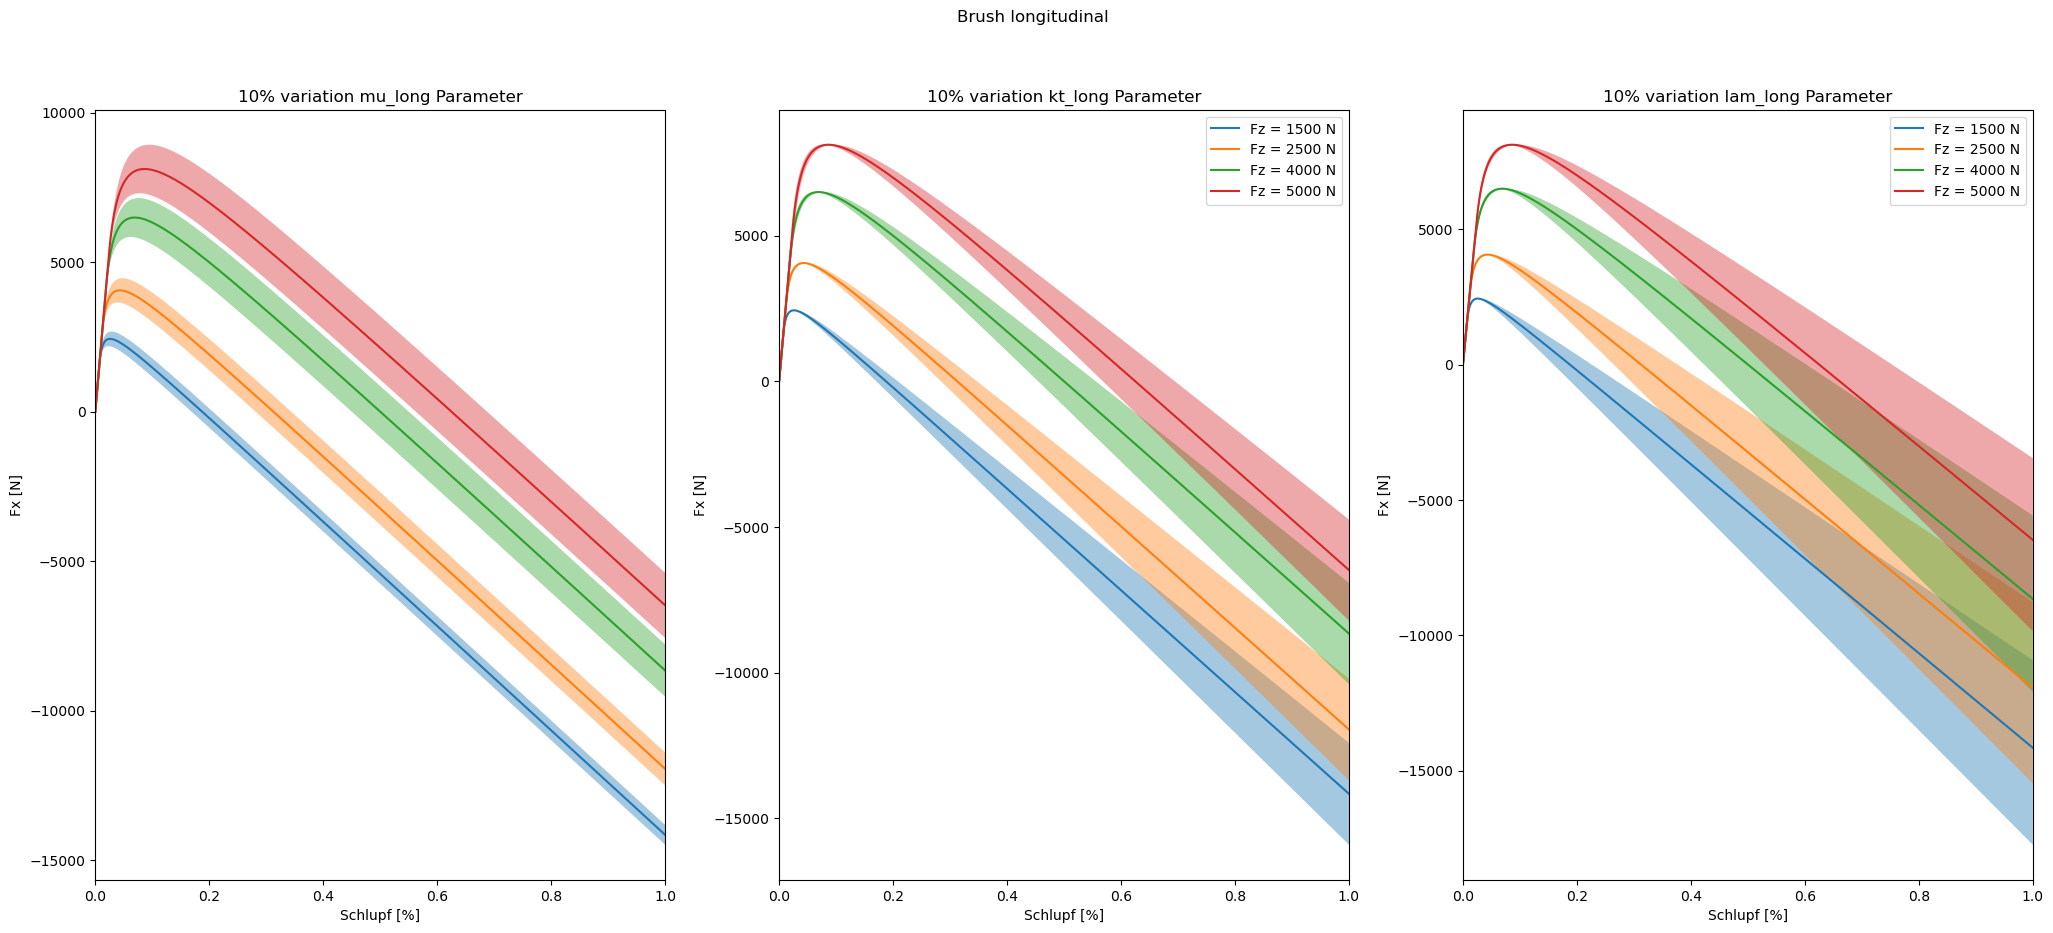

In [92]:
Fz = [1500, 2500, 4000, 5000]

Sx = np.linspace(0,1,1000)
mu_long  = 1.62344260e+00
kt_long  = 3.63683914e+06
lam_long = 3.10083340e-02

fig, ax = plt.subplots(1,3, figsize = (25,10))
fig.suptitle('Brush longitudinal')
for j in range(len(Fz)):
    Fx = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long)
    ax[0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_long_pos =  mu_long * 1.1
    Fx_pos = br.brush_long(Sx,Fz[j],mu_long_pos,kt_long,lam_long)
    #plt.plot(Sy,Fy_pos, 'r--')

    mu_long_neg =  mu_long * 0.9
    Fx_neg = br.brush_long(Sx,Fz[j],mu_long_neg,kt_long,lam_long)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[0].set_title('10% variation mu_long Parameter')
ax[0].set_ylabel('Fx [N]')
ax[0].set_xlabel('Schlupf [%]')
ax[0].set_xlim((0,1))
ax[1].legend()

for j in range(len(Fz)):
    Fx = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long)
    ax[1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    kt_long_pos =  kt_long * 1.1
    Fx_pos = br.brush_long(Sx,Fz[j],mu_long,kt_long_pos,lam_long)
    #plt.plot(Sy,Fy_pos, 'r--')

    kt_long_neg =  kt_long * 0.9
    Fx_neg = br.brush_long(Sx,Fz[j],mu_long,kt_long_neg,lam_long)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[1].set_title('10% variation kt_long Parameter')
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlabel('Schlupf [%]')
ax[1].set_xlim((0,1))
ax[1].legend()

for j in range(len(Fz)):
    Fx = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long)
    ax[2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    lam_long_pos =  lam_long * 1.1
    Fx_pos = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    lam_long_neg =  lam_long * 0.9
    Fx_neg = br.brush_long(Sx,Fz[j],mu_long,kt_long,lam_long_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.4)
ax[2].set_title('10% variation lam_long Parameter')
ax[2].set_ylabel('Fx [N]')
ax[2].set_xlabel('Schlupf [%]')
ax[2].set_xlim((0,1))
ax[2].legend()

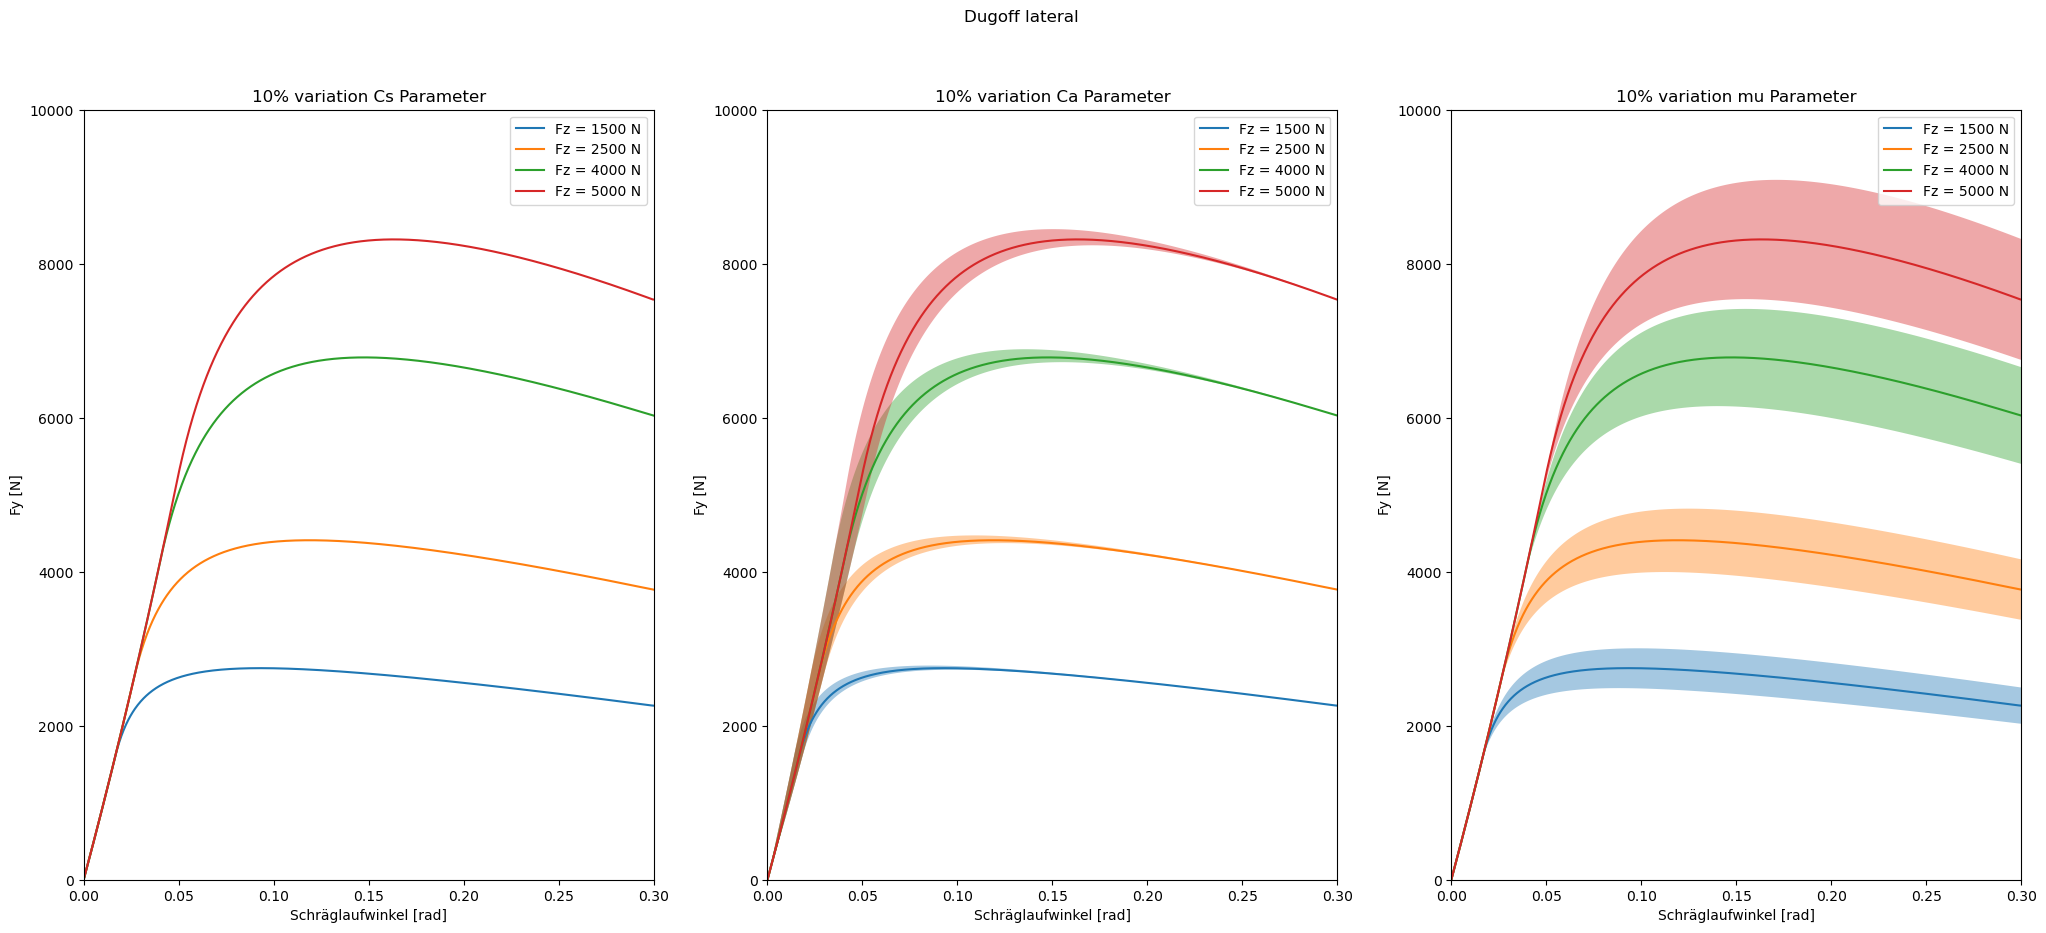

In [93]:
Fz = [1500, 2500, 4000, 5000]

Sy = np.linspace(0,0.3,1000)
Cs = 2.74289218e-01
Ca = 6.16477615e+03
mu = 1.43548745e-01


fig, ax = plt.subplots(1,3, figsize = (25,10))
fig.suptitle('Dugoff lateral')
for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[0].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Cs_pos =  Cs * 1.5
    Fy_pos = du.dugoff_lat(Sx,Sy,Fz[j],Cs_pos,Ca,mu)
    #plt.plot(Sy,Fy_pos, 'r--')

    Cs_neg =  Cs * 0.5
    Fy_neg = du.dugoff_lat(Sx,Sy,Fz[j],Cs_neg,Ca,mu)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.6)
ax[0].set_title('10% variation Cs Parameter')
ax[0].set_ylabel('Fy [N]')
ax[0].set_xlabel('Schräglaufwinkel [rad]')
ax[0].set_xlim((0,0.3))
ax[0].set_ylim((0,10000))
ax[0].legend()


for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[1].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Ca_pos =  Ca * 1.2
    Fy_pos = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca_pos,mu)
    #plt.plot(Sy,Fy_pos, 'r--')

    Ca_neg =  Ca * 0.9
    Fy_neg = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca_neg,mu)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[1].set_title('10% variation Ca Parameter')
ax[1].set_ylabel('Fy [N]')
ax[1].set_xlabel('Schräglaufwinkel [rad]')
ax[1].set_xlim((0,0.3))
ax[1].set_ylim((0,10000))
ax[1].legend()



for j in range(len(Fz)):
    Fy = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[2].plot(Sy,Fy,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_pos =  mu * 1.1
    Fy_pos = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    mu_neg =  mu * 0.9
    Fy_neg = du.dugoff_lat(Sx,Sy,Fz[j],Cs,Ca,mu_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[2].fill_between(Sy,Fy_pos,Fy_neg,  alpha = 0.4)
ax[2].set_title('10% variation mu Parameter')
ax[2].set_ylabel('Fy [N]')
ax[2].set_xlabel('Schräglaufwinkel [rad]')
ax[2].set_xlim((0,0.3))
ax[2].set_ylim((0,10000))
ax[2].legend()


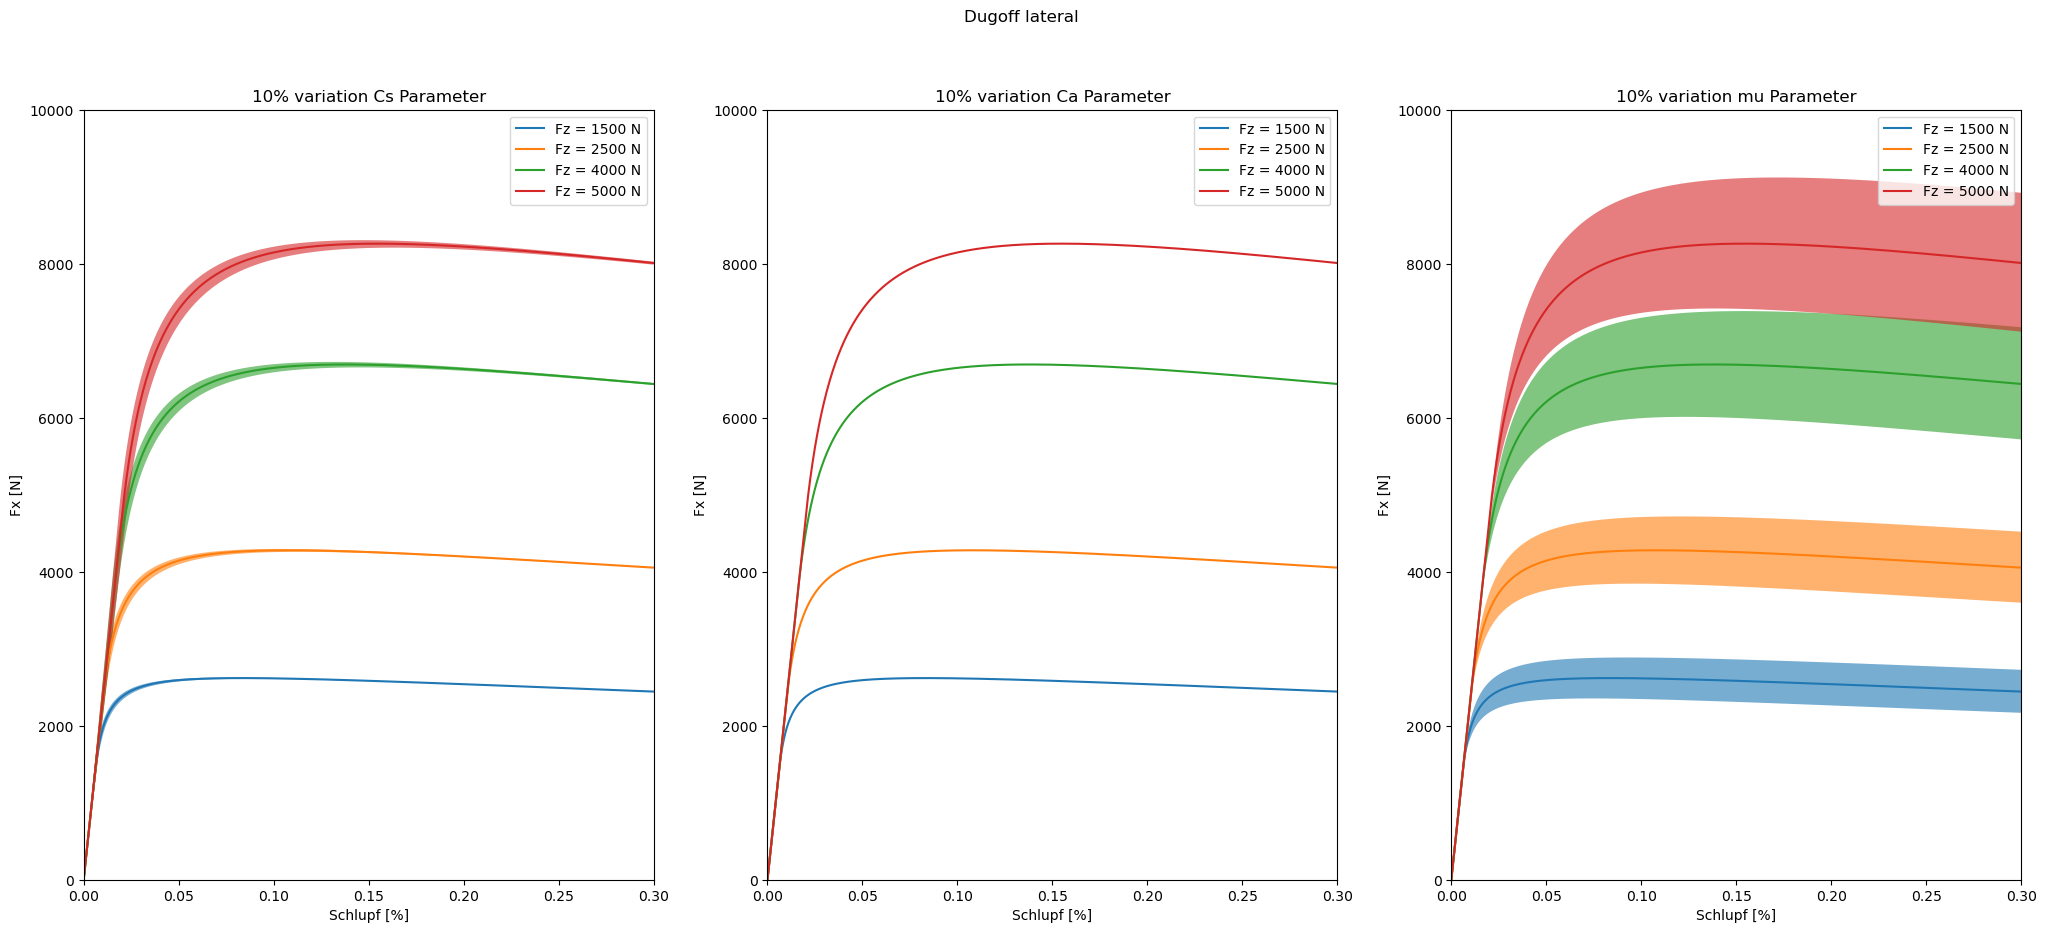

In [94]:
Fz = [1500, 2500, 4000, 5000]

Sx = np.linspace(0,0.3,1000)
Cs = 1.54528498e+05
Ca = -1.96810483e+01
mu = 1.25090001e+00

fig, ax = plt.subplots(1,3, figsize = (25,10))
fig.suptitle('Dugoff lateral')
for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Cs_pos =  Cs * 1.1
    Fx_pos = du.dugoff_long(Sx,Sy,Fz[j],Cs_pos,Ca,mu)
    #plt.plot(Sy,Fy_pos, 'r--')

    Cs_neg =  Cs * 0.9
    Fx_neg = du.dugoff_long(Sx,Sy,Fz[j],Cs_neg,Ca,mu)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[0].set_title('10% variation Cs Parameter')
ax[0].set_ylabel('Fx [N]')
ax[0].set_xlabel('Schlupf [%]')
ax[0].set_xlim((0,0.3))
ax[0].set_ylim((0,10000))
ax[0].legend()


for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[1].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    Ca_pos =  Ca * 1.1
    Fx_pos = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca_pos,mu)
    #plt.plot(Sy,Fy_pos, 'r--')

    Ca_neg =  Ca * 0.9
    Fx_neg = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca_neg,mu)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[1].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[1].set_title('10% variation Ca Parameter')
ax[1].set_ylabel('Fx [N]')
ax[1].set_xlabel('Schlupf [%]')
ax[1].set_xlim((0,0.3))
ax[1].set_ylim((0,10000))
ax[1].legend()


for j in range(len(Fz)):
    Fx = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu)
    ax[2].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    mu_pos =  mu * 1.1
    Fx_pos = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu_pos)
    #plt.plot(Sy,Fy_pos, 'r--')

    mu_neg =  mu * 0.9
    Fx_neg = du.dugoff_long(Sx,Sy,Fz[j],Cs,Ca,mu_neg)
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[2].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[2].set_title('10% variation mu Parameter')
ax[2].set_ylabel('Fx [N]')
ax[2].set_xlabel('Schlupf [%]')
ax[2].set_xlim((0,0.3))
ax[2].set_ylim((0,10000))
ax[2].legend()



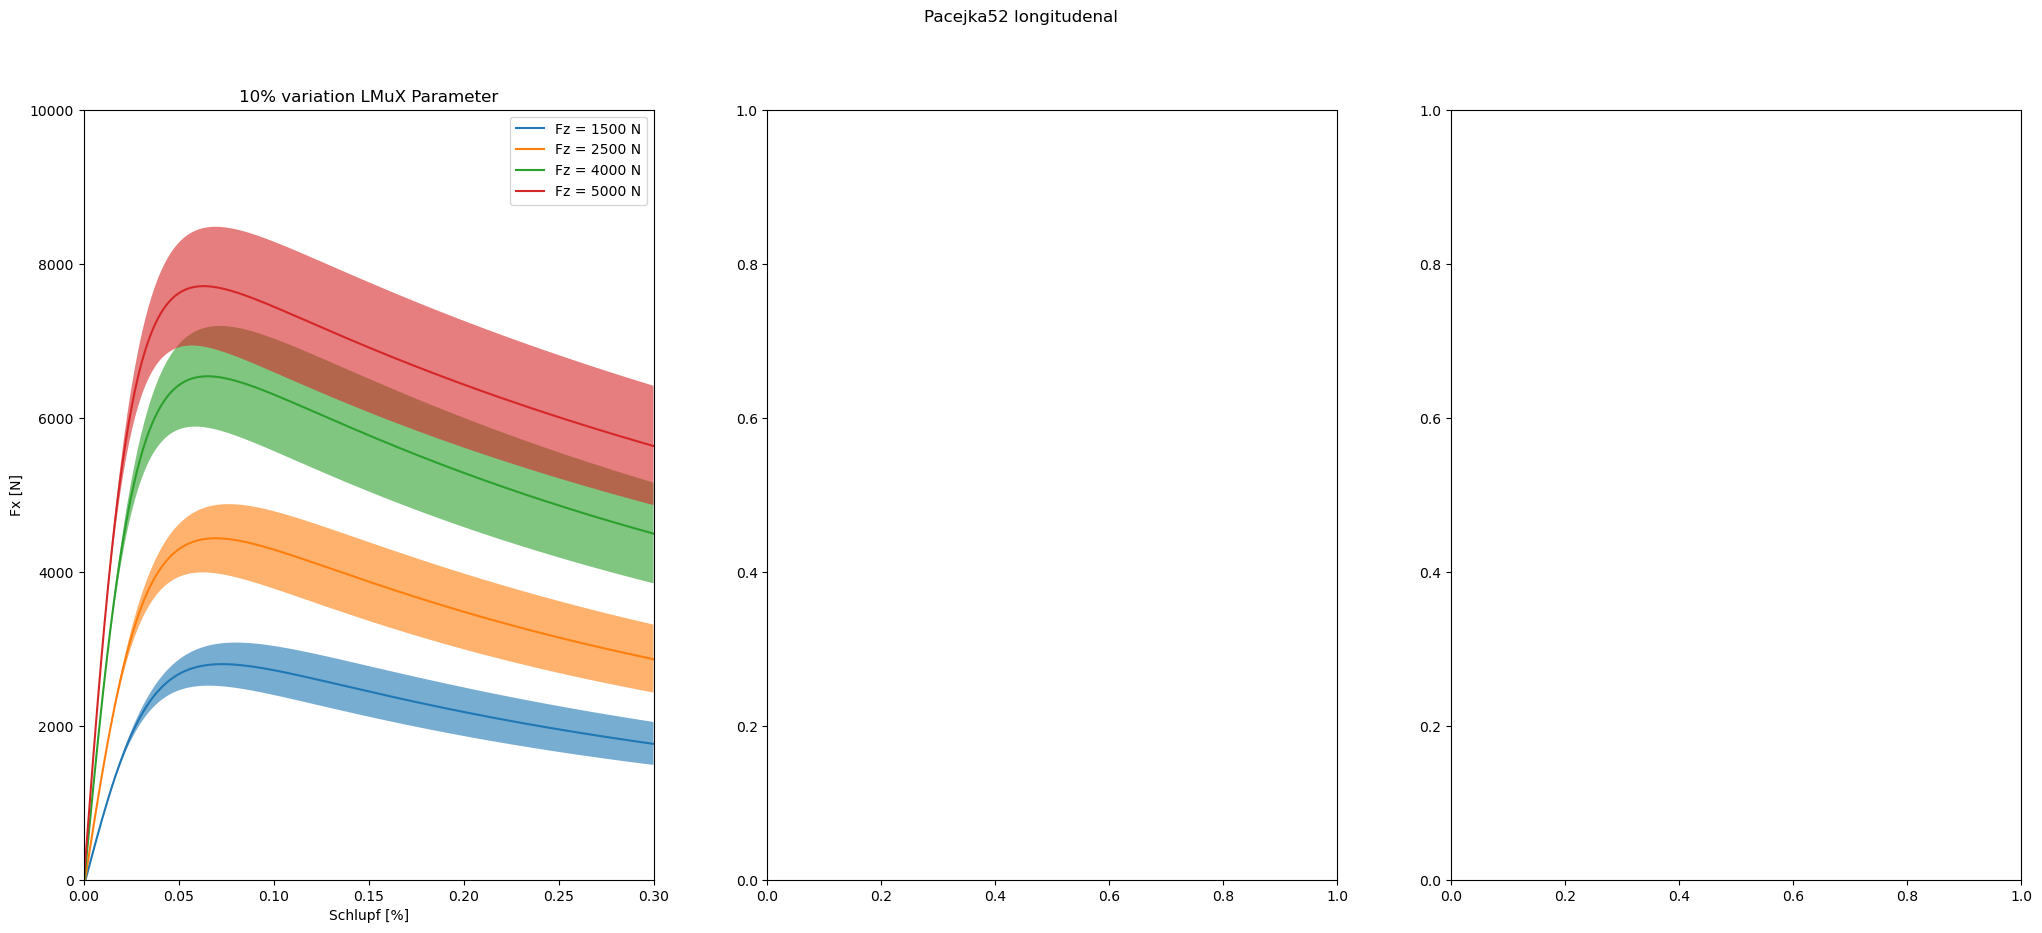

In [6]:
Fz = [1500, 2500, 4000, 5000]
Sx = np.linspace(0,0.3,1000)
Fz0 = 3114

fig, ax = plt.subplots(1,3, figsize = (25,10))
fig.suptitle('Pacejka52 longitudenal')
for j in range(len(Fz)):
    Fx = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX)[0]
    ax[0].plot(Sx,Fx,label = f"Fz = {Fz[j]} N")

for j in range(len(Fz)):    
    LMUX_pos =   pa.LMUX * 1.1
    Fx_pos = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, LMUX_pos, pa.LEX )[0]
    #plt.plot(Sy,Fy_pos, 'r--')

    LMUX_neg =   pa.LMUX * 0.9
    Fx_neg = pa52gl.Pacejka52_long(Sx,Fz[j],Fz0,pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, LMUX_neg, pa.LEX )[0]
    #plt.plot(Sy,Fy_pos, 'r--')
    ax[0].fill_between(Sx,Fx_pos,Fx_neg,  alpha = 0.6)
ax[0].set_title('10% variation LMUX Parameter')
ax[0].set_ylabel('Fx [N]')
ax[0].set_xlabel('Schlupf [%]')
ax[0].set_xlim((0,0.3))
ax[0].set_ylim((0,10000))
ax[0].legend()



In [8]:
import numpy as np
import matplotlib.pyplot as plt


def plot_pacejka_with_varied_parameter(parameter_name, parameter_value, variation_percent):
    # create a copy of the original parameter value
    parameter_value_copy = parameter_value
    # modify the parameter value by the given percentage
    parameter_value_modified = parameter_value * (1 + variation_percent/100)
    # create arrays for the range of slip ratios and vertical loads
    Sx = np.linspace(0, 0.3, 100)
    Fz = np.linspace(1000, 10000, 10)
    Fz0 = 5000
    # create a plot with multiple lines for different vertical loads
    fig, ax = plt.subplots()
    for j in range(len(Fz)):
        Fx = pa52gl.Pacejka52_long(Sx, Fz[j], Fz0, *parameter_value_copy)[0]
        ax.plot(Sx, Fx, label=f'Fz = {Fz[j]} N')
    # create lines for modified parameter values
    Fx_pos = pa52gl.Pacejka52_long(Sx, Fz[0], Fz0, *parameter_value_modified)[0]
    Fx_neg = pa52gl.Pacejka52_long(Sx, Fz[0], Fz0, *parameter_value_copy)[0]
    # fill the area between the modified and original lines
    ax.fill_between(Sx, Fx_pos, Fx_neg, alpha=0.6)
    # set plot title and axis labels
    ax.set_title(f'10% variation {parameter_name} parameter')s
    ax.set_ylabel('Fx [N]')
    ax.set_xlabel('Schlupf [%]')
    ax.set_xlim((0, 0.3))
    ax.set_ylim((0, 10000))
    ax.legend()
    # show the plot
    plt.show()

plot_pacejka_with_varied_parameter('PHX1', [pa.PHX1, pa.PHX2, pa.PKX1, pa.PKX2, pa.PKX3, pa.PCX1, pa.PDX1, pa.PDX2, pa.PDX3, pa.PEX1, pa.PEX2, pa.PEX4, pa.PVX1, pa.PVX2, pa.LMUX, pa.LEX], 10)



TypeError: can't multiply sequence by non-int of type 'float'